<a href="https://colab.research.google.com/github/my-roki/KOSA_Fpht/blob/master/z_project/Keras_Architecture_VGG19_Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###part 0
from tensorflow.keras import Input, layers, models
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.applications import VGG19

import numpy as np

In [2]:

#vgg19 모델 불러오기
pre_trained_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

In [3]:
# vgg19 밑에 레이어 추가
from tensorflow import keras

model = models.Sequential()
model.add(pre_trained_vgg)
model.add(layers.Flatten())
model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))

callbacks_list = [keras.callbacks.EarlyStopping(monitor = 'val_acc',
                                                patience = 5),
                 keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                    monitor = 'val_loss',
                                                    save_best_only = True)]

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              134221824 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
### part 2

X_train, X_test, y_train, y_test = np.load('drive/My Drive/Project/9labels_unknwon_mixed.npy', allow_pickle=True)

print(X_train.shape)

X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

history = model.fit(X_train, y_train, batch_size = 16, epochs = 50, callbacks=callbacks_list, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test)

(481, 256, 256, 3)
Epoch 1/50
31/31 [==============================] - 25s 803ms/step - loss: 403.5473 - acc: 0.1642 - val_loss: 163.4079 - val_acc: 0.1925
Epoch 2/50
31/31 [==============================] - 50s 2s/step - loss: 118.8788 - acc: 0.3098 - val_loss: 89.1073 - val_acc: 0.5093
Epoch 3/50
31/31 [==============================] - 41s 1s/step - loss: 79.7214 - acc: 0.4491 - val_loss: 71.8634 - val_acc: 0.5901
Epoch 4/50
31/31 [==============================] - 47s 2s/step - loss: 68.4124 - acc: 0.5239 - val_loss: 63.4278 - val_acc: 0.8012
Epoch 5/50
31/31 [==============================] - 46s 1s/step - loss: 61.4047 - acc: 0.5988 - val_loss: 58.0168 - val_acc: 0.7702
Epoch 6/50
31/31 [==============================] - 45s 1s/step - loss: 55.6636 - acc: 0.6923 - val_loss: 52.8778 - val_acc: 0.8012
Epoch 7/50
31/31 [==============================] - 46s 1s/step - loss: 51.2456 - acc: 0.7110 - val_loss: 48.2765 - val_acc: 0.8509
Epoch 8/50
31/31 [==============================] -

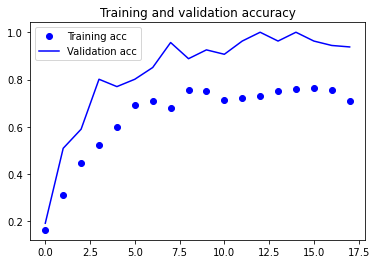

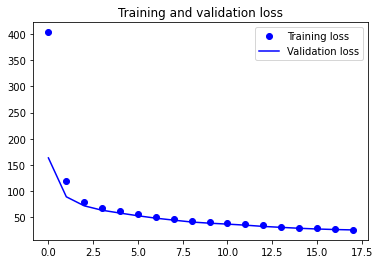

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('hock14.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.10087182, 0.32651997, 0.04167801, 0.20664594, 0.03407995,
        0.06749188, 0.0380106 , 0.13712986, 0.04757196]], dtype=float32)

In [22]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('hock6.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.17850204, 0.43966538, 0.03811057, 0.14242148, 0.02389002,
        0.06606182, 0.02115861, 0.05913603, 0.03105399]], dtype=float32)

In [23]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('hui8.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[2.4050692e-04, 9.9809557e-01, 1.0028813e-04, 3.4343841e-05,
        5.0320526e-05, 1.1964576e-04, 2.8734719e-06, 1.2474130e-03,
        1.0899326e-04]], dtype=float32)

In [13]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('ji38.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00258832, 0.01174481, 0.8624565 , 0.00126946, 0.00269361,
        0.10394734, 0.00181903, 0.001594  , 0.01188689]], dtype=float32)

In [9]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('moon10.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.0460413 , 0.09054531, 0.02412029, 0.527693  , 0.011826  ,
        0.1026784 , 0.06062732, 0.11549161, 0.02097686]], dtype=float32)

In [8]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('rok16.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00414254, 0.01632177, 0.00393868, 0.00123281, 0.84316957,
        0.00329113, 0.01716926, 0.00646055, 0.10427368]], dtype=float32)

In [14]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('sk18.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[4.3900649e-04, 7.0340284e-03, 8.9650517e-03, 8.3926524e-04,
        3.0034644e-04, 9.7443527e-01, 4.2228410e-03, 2.6083950e-04,
        3.5032858e-03]], dtype=float32)

In [15]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('sk38.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[4.7617932e-04, 8.4700324e-03, 9.3226265e-03, 8.8839908e-04,
        3.2659195e-04, 9.7227651e-01, 4.1433536e-03, 2.9502873e-04,
        3.8012869e-03]], dtype=float32)

In [16]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('tae156.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00531155, 0.00134027, 0.00345784, 0.0362188 , 0.00700772,
        0.07402094, 0.85916865, 0.00563634, 0.00783792]], dtype=float32)

In [17]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('su141.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00626085, 0.29045662, 0.005897  , 0.02473189, 0.01368529,
        0.00581675, 0.00664868, 0.635462  , 0.01104086]], dtype=float32)

In [18]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('hye66.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00758425, 0.3707197 , 0.00693519, 0.03417253, 0.01239343,
        0.00985847, 0.00752422, 0.5348715 , 0.01594079]], dtype=float32)

In [19]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('yoon86.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[7.9606616e-05, 3.4399446e-02, 4.4304295e-05, 3.4098576e-03,
        4.1461328e-05, 4.5780031e-05, 4.5752360e-05, 9.6189827e-01,
        3.5551562e-05]], dtype=float32)

In [21]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('yang43.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00347952, 0.05226571, 0.01856849, 0.00298302, 0.04309804,
        0.03177145, 0.00534457, 0.00654506, 0.8359442 ]], dtype=float32)

In [24]:
model.save("vgg19_9model.h5")

In [27]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('sdddd.jpg', target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.02112474, 0.5479188 , 0.0405183 , 0.04027485, 0.03400387,
        0.09864745, 0.02635038, 0.13499385, 0.05616781]], dtype=float32)

In [ ]:
img = image.load_img('frame17.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

In [ ]:
img = image.load_img('frame594.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

In [ ]:
img = image.load_img('frame23.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)